### Import libraries 

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVC

### Read csv file 

In [114]:
def read_file(path):
    df = None
    if path.split('.')[-1] == 'csv':
        df = pd.read_csv(path)
        return df
        
file_path = 'titanic_dataset.csv'
titanic_data = read_file(file_path)

### Explore data table 

In [115]:
print('Shape of the {0} datset: {1}'.format(file_path.split('\\')[-1],titanic_data.shape))

titanic_data.head()

Shape of the titanic_dataset.csv datset: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [116]:
titanic_data.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


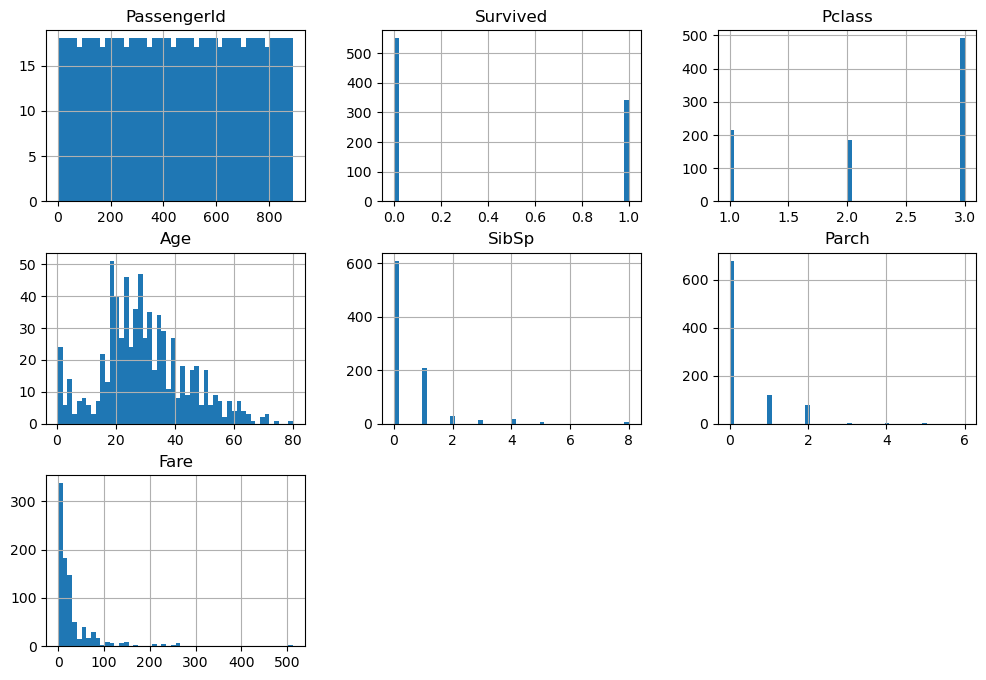

In [83]:
def plot_hist(df):
    df.hist(bins=50, figsize=(12,8))
    plt.show()

plot_hist(titanic_data)

<Axes: xlabel='Sex', ylabel='Count'>

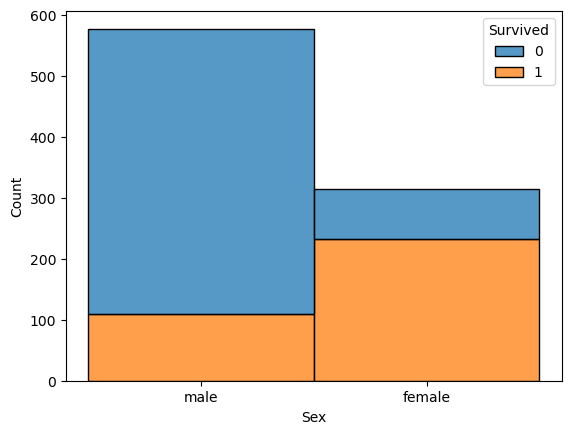

In [84]:
sns.histplot(data=titanic_data, x='Sex', hue='Survived', multiple='stack')

### Prepocessing Dataset

In [118]:
# checking how many null values exist in each column
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [119]:
# categorized value count in Embarked column 

titanic_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [121]:
# In which rows the value of Embarked is Null

titanic_data.loc[titanic_data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [122]:
# replacing the null cell with 'S'(509 data points are in 'S' category which is maximum)

titanic_data['Embarked'].replace(np.nan, 'S', inplace = True)

In [123]:
# categorizing the values of Age column and creating a new col named 'Update_Age'

titanic_data.loc[(titanic_data['Age'].isnull()), 'Updated_Age'] = 'N'
titanic_data.loc[(titanic_data['Age']>=0)&(titanic_data['Age']<15), 'Updated_Age'] = 'A'
titanic_data.loc[(titanic_data['Age']>=15)&(titanic_data['Age']<35), 'Updated_Age'] = 'B'
titanic_data.loc[(titanic_data['Age']>=35)&(titanic_data['Age']<55), 'Updated_Age'] = 'C'
titanic_data.loc[(titanic_data['Age']>=55)&(titanic_data['Age']<65), 'Updated_Age'] = 'D'
titanic_data.loc[(titanic_data['Age']>=65), 'Updated_Age'] = 'B'

In [124]:
# droping the unnecessary features
titanic_data.drop(['PassengerId','Name','Cabin','Ticket','Age'],axis=1,inplace=True)

In [125]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    object 
 3   SibSp        891 non-null    int64  
 4   Parch        891 non-null    int64  
 5   Fare         891 non-null    float64
 6   Embarked     891 non-null    object 
 7   Updated_Age  891 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 55.8+ KB


In [126]:
# converting the categorical col values into numbers so that we can train it into a model

labelencoder = LabelEncoder()
categorical_cols=['Embarked','Sex','Updated_Age']
titanic_data[categorical_cols] = titanic_data[categorical_cols].apply(lambda col: labelencoder.fit_transform(col))

In [127]:
titanic_data.rename(columns={'Updated_Age':'Age'}, inplace=True)
titanic_data.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age
0,0,3,1,1,0,7.2500,2,1
1,1,1,0,1,0,71.2833,0,2
2,1,3,0,0,0,7.9250,2,1
3,1,1,0,1,0,53.1000,2,2
4,0,3,1,0,0,8.0500,2,2


In [128]:
titanic_data.describe(include='all')

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,0.523008,0.381594,32.204208,1.536476,1.794613
std,0.486592,0.836071,0.477990,1.102743,0.806057,49.693429,0.791503,1.265539
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,0.000000,7.910400,1.000000,1.000000
50%,0.000000,3.000000,1.000000,0.000000,0.000000,14.454200,2.000000,1.000000
75%,1.000000,3.000000,1.000000,1.000000,0.000000,31.000000,2.000000,2.000000
max,1.000000,3.000000,1.000000,8.000000,6.000000,512.329200,2.000000,4.000000


In [129]:
# checking if there exists any null value in any column
titanic_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Age         0
dtype: int64

### Feature Extraction

In [135]:
# i didn't take the 'Sex' and 'Age' features but i have done the 
# data pre-processing steps for them just to know the steps.

y=titanic_data['Survived']
X=titanic_data[['Pclass','Embarked','Parch']]

### Creating a new dataFrame with Normalize values

In [139]:
d = preprocessing.normalize(X) 
scaled_df = pd.DataFrame(d,columns=list(X.columns.values))
scaled_df.head()

,Pclass,Embarked,Parch
0,0.832050,0.554700,0.0
1,1.000000,0.000000,0.0
2,0.832050,0.554700,0.0
3,0.447214,0.894427,0.0
4,0.832050,0.554700,0.0


### Shuffle and split the dataset into test and train data 

In [140]:
def shuffle_and_split_data(data, test_ratio):
    shuffle_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffle_indices[:test_set_size]
    train_indices = shuffle_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

X_train, X_test = shuffle_and_split_data(X, 0.2)
y_train, y_test = shuffle_and_split_data(y, 0.2)

print('Train data size: {0}'.format(len(X_train)))
print('Test data size: {0}'.format(len(y_train)))

Train data size: 713
Test data size: 713


### Create model, train model and make prediction

In [143]:
svc = SVC(decision_function_shape='ovo')
svc = svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

print('Mean Absolute Erroe(MAE): {0}'.format(mean_absolute_error(y_test, y_pred)))

Mean Absolute Erroe(MAE): 0.449438202247191
